# Interpolation Using Numerical Methods

## Methods:
- Newton Interpolation (Divided Differences)
- Lagrange Interpolation
- Cubic Spline Interpolation

## Dataset:
Population data for a major city (1990–2015)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given data (census years and population)

t = np.array([1990, 1995, 2000, 2005, 2010, 2015])
y = np.array([2450800, 2710500, 2890200, 3150700, 3420300, 3810600])

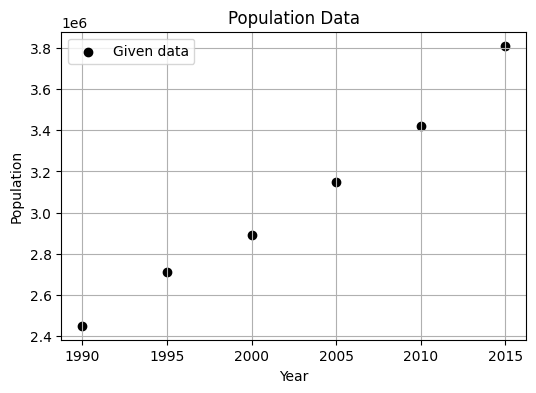

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Data")
plt.grid(True)
plt.legend()
plt.show()

## Newton Interpolation (Divided Differences)

This method constructs an interpolating polynomial using divided differences.
The resulting polynomial passes exactly through all given data points.

In [4]:
def divided_differences(x, y):
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

In [5]:
def newton_polynomial(x_data, diff_table, x):
    n = len(x_data)
    result = diff_table[0, 0]
    product = 1.0

    for i in range(1, n):
        product *= (x - x_data[i - 1])
        result += diff_table[0, i] * product

    return result

In [6]:
diff_table = divided_differences(t, y)

t_smooth = np.linspace(t.min(), t.max(), 300)
y_newton = np.array([newton_polynomial(t, diff_table, ti) for ti in t_smooth])

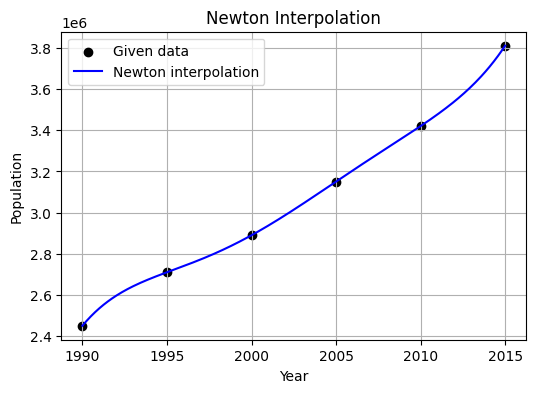

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.plot(t_smooth, y_newton, color="blue", label="Newton interpolation")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Newton Interpolation")
plt.grid(True)
plt.legend()
plt.show()

## Polynomial Interpolation (Degree 5)

A polynomial of degree 5 is constructed to pass exactly through all data points.
This polynomial is equivalent to the Newton and Lagrange interpolating polynomials.

In [ ]:
coeff_poly = np.polyfit(t, y, 5)

# Create polynomial function
poly_func = np.poly1d(coeff_poly)

print("Interpolating polynomial (degree 5):")
print(poly_func)

In [ ]:
y_poly = poly_func(t_smooth)

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(t, y, color="black", label="Given data")
plt.plot(t_smooth, y_poly, color="red", label="Polynomial interpolation (deg 5)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Polynomial Interpolation (Degree 5)")
plt.grid(True)
plt.legend()
plt.show()